# Delicious Asian and Indian Cuisines 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [66]:
df  = pd.read_csv('../data/cuisines.csv')
df.shape

(2448, 385)

<AxesSubplot: >

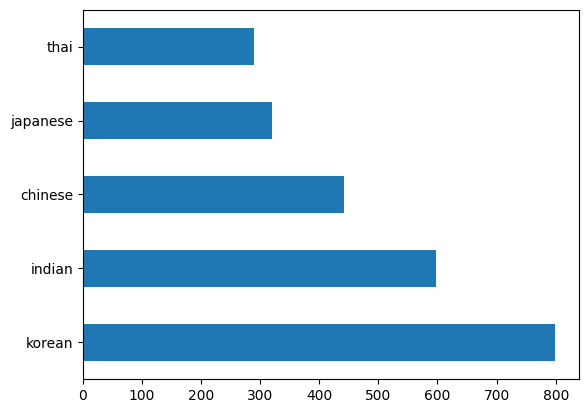

In [8]:
df.cuisine.value_counts().plot.barh()

In [16]:
df[df['cuisine'] == 'thai'].value_counts().sum()

289

Nombre de données présente par cuisine

In [104]:
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')
# c = korean_df.drop(columns=['cuisine','Unnamed: 0']).sum().to_frame('value')
# c = c[(c.T != 0).any()]
# c.T

thai df: (289, 385)
japanese df: (320, 385)
chinese df: (442, 385)
indian df: (598, 385)
korean df: (799, 385)


Ma technique

In [20]:
def nbIng(test):
    i = df[df['cuisine'] == test].value_counts().sum()
    return i

print(f'thai df: {nbIng("thai")}')
print(f'japanese df: {nbIng("japanese")}')
print(f'chinese df: {nbIng("chinese")}')
print(f'indian df: {nbIng("indian")}')
print(f'korean df: {nbIng("korean")}')

thai df: 289
japanese df: 320
chinese df: 442
indian df: 598
korean df: 799


In [106]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
    return ingredient_df

<AxesSubplot: >

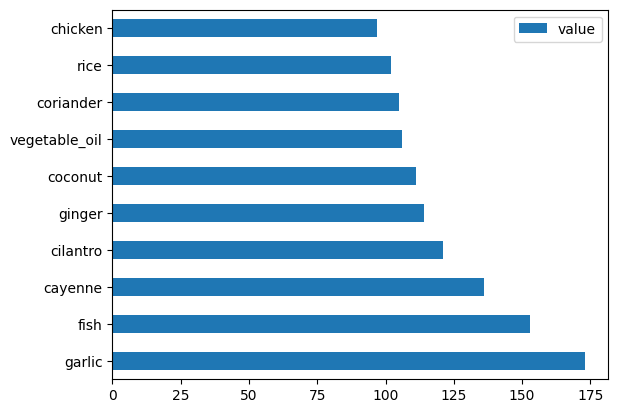

In [107]:
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

In [60]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Begin Classification

 SMOTE - "Synthetic Minority Over-sampling Technique" - pour équilibrer les données.

In [61]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

En équilibrant vos données, vous obtiendrez de meilleurs résultats lors de leur classification. Pensez à une classification binaire. Si la plupart de vos données sont une classe, un modèle ML va prédire cette classe plus fréquemment, simplement parce qu'il y a plus de données pour elle. L'équilibrage des données prend toutes les données biaisées et aide à éliminer ce déséquilibre.

In [62]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

new label count: indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64
old label count: korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


In [65]:
transformed_feature_df.shape

(3995, 380)

In [67]:
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')

In [68]:
transformed_df.shape

(3995, 381)

In [70]:
transformed_df.to_csv("../data/cleaned_cuisines.csv")